# IS 445 Final Project
#### Linh Pham

Name of Dataset: Graduates

Origin of Dataset: National Science Foundation (https://www.nsf.gov/statistics/srvyrecentgrads/), provided by CORGIS Dataset Project (https://think.cs.vt.edu/corgis/csv/graduates/)

Dataset License: It is a public dataset that users can use, modify, adapt, and share so long as they give credit. Therefore, best guess is Open Data Commons Attribution License.

Size of Dataset: 517 rows by 50 columns, 169 KB in memory, within Github upload size limits


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets

In [2]:
df = pd.read_csv("graduates.csv")
df

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999.0,0.0,160585.73,51000.0,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999.0,9000.0,126176.52,56000.0,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999.0,8000.0,148872.00,60000.0,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999.0,10000.0,129070.55,50000.0,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999.0,0.0,134299.53,49000.0,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2015,1176525,Sociology,1223166.0,0.0,58871.70,50000.0,1798,62083.18,59244,...,85782,151538,261143,415552,204818,72050,342903,183692,345302,301924
513,2015,55738,Statistics,1038725.0,0.0,99210.87,88000.0,157,90534.66,16211,...,13908,11798,8419,19960,3437,5489,12803,7736,10741,6290
514,2015,169991,"Zoology, General",1223166.0,0.0,86957.98,60000.0,317,124675.05,17563,...,15366,30180,29873,60016,29924,24622,57404,30979,35810,56660
515,2015,0,Management & Administration,0.0,0.0,0.00,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['Year', 'Demographics.Total', 'Education.Major', 'Salaries.Highest',
       'Salaries.Lowest', 'Salaries.Mean', 'Salaries.Median',
       'Salaries.Quantity', 'Salaries.Standard Deviation',
       'Demographics.Ethnicity.Asians', 'Demographics.Ethnicity.Minorities',
       'Demographics.Ethnicity.Whites', 'Demographics.Gender.Females',
       'Demographics.Gender.Males', 'Education.Degrees.Bachelors',
       'Education.Degrees.Doctorates', 'Education.Degrees.Masters',
       'Education.Degrees.Professionals',
       'Employment.Employer Type.Business/Industry',
       'Employment.Employer Type.Educational Institution',
       'Employment.Employer Type.Government',
       'Employment.Reason Working Outside Field.Career Change',
       'Employment.Reason Working Outside Field.Family-related',
       'Employment.Reason Working Outside Field.Job Location',
       'Employment.Reason Working Outside Field.No Job Available',
       'Employment.Reason Working Outside Field.Other',
     

In [4]:
mean_salary_by_major = df.groupby("Education.Major").describe()["Salaries.Mean"]["mean"]
mean_salary_by_major

Education.Major
Agricultural Economics                  27696.541818
Animal Sciences                         23114.071818
Anthropology and Archeology             20935.497273
Area and Ethnic Studies                 21432.375455
Atmospheric Sciences and Meteorology    25884.515455
Biochemistry and Biophysics             29937.074545
Biological Sciences                     66046.293636
Botany                                  22815.198182
Chemical Engineering                    76814.402727
Chemistry                               69368.358182
Civil Engineering                       70617.574545
Computer Science and Math               69659.744545
Criminology                             21212.921818
Earth Sciences                          24308.038182
Economics                               75096.274545
Electrical Engineering                  79097.928182
Environmental Science Studies           21794.502727
Food Sciences and Technology            25884.434545
Forestry Services             

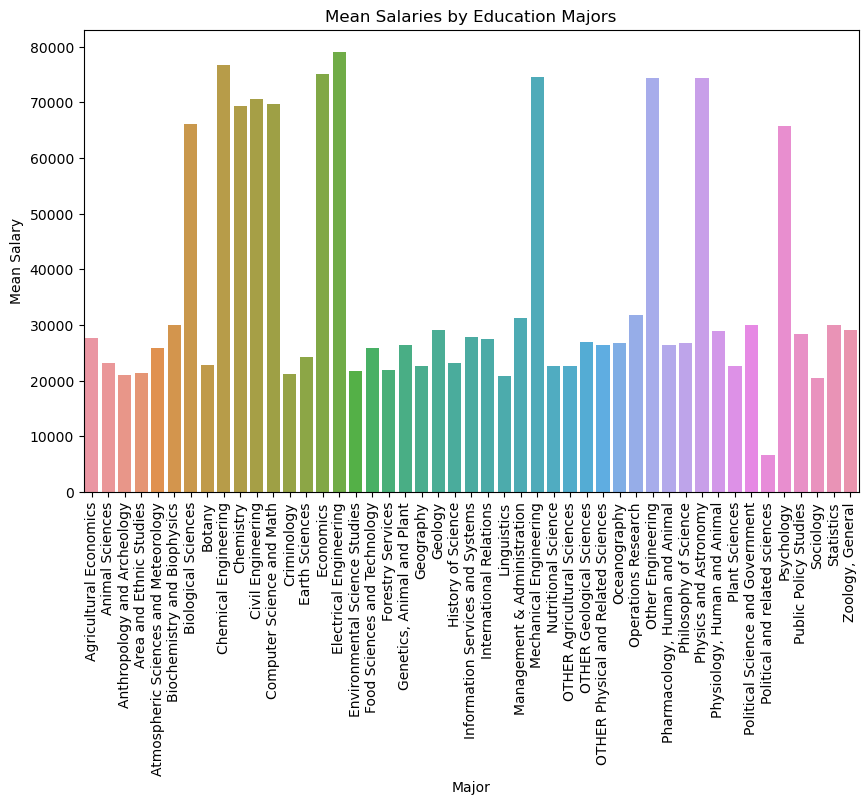

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=mean_salary_by_major.index, y=mean_salary_by_major)
plt.title("Mean Salaries by Education Majors")
plt.xlabel("Major")
plt.ylabel("Mean Salary")
plt.xticks(rotation=90)
plt.show()

### Write-up
The dataset includes the mean salaries of 47 majors for 11 different years, so there are 517 (47*11) mean salaries. Each bar in the barplot measures the **mean of mean salaries** for the corresponding major across all 11 years, so there are 47 bars.

In [6]:
mean_salary_by_year = df.groupby("Year").describe()["Salaries.Mean"]["mean"]
mean_salary_by_year

Year
1993    38591.591277
1995    13592.655957
1997    15030.434043
1999    16284.031702
2001    10700.920851
2003    63261.571277
2006    10556.348936
2008    12194.316170
2010    67537.238085
2013    71659.841489
2015    77979.243830
Name: mean, dtype: float64

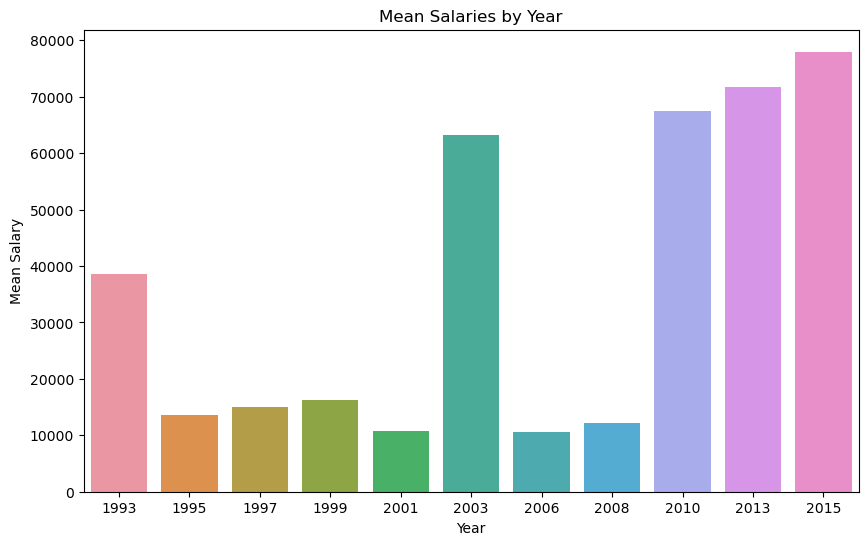

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=mean_salary_by_year.index, y=mean_salary_by_year)
plt.title("Mean Salaries by Year")
plt.xlabel("Year")
plt.ylabel("Mean Salary")
plt.show()

In [8]:
degrees_by_year = df.groupby("Year").agg("sum")["Demographics.Total"]
degrees_by_year

Year
1993     7714187
1995     7974877
1997     8307491
1999     8628286
2001      625286
2003    13661279
2006     1325854
2008      941339
2010    17970466
2013    19499592
2015    21380924
Name: Demographics.Total, dtype: int64

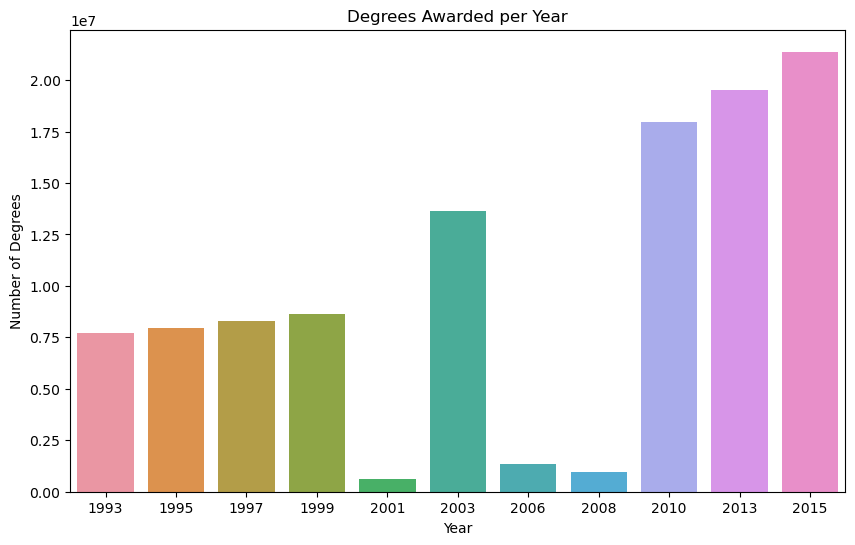

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=degrees_by_year.index, y=degrees_by_year)
plt.title("Degrees Awarded per Year")
plt.xlabel("Year")
plt.ylabel("Number of Degrees")
plt.show()

In [49]:
@ipywidgets.interact(y_axis=["Demographics.Total", "Demographics.Gender.Females", "Demographics.Ethnicity.Minorities", "Salaries.Mean", "Employment.Status.Unemployed"])
def plot_scatterplot(y_axis):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.scatter(x=df["Education.Major"], y=df[y_axis], c=df["Year"], marker="o")
    plt.xlabel(str("Major"))
    plt.ylabel(str(y_axis))
    plt.title(str(y_axis)+" by Major, colored by Year")
    plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='y_axis', options=('Demographics.Total', 'Demographics.Gender.Femal…

In [50]:
import altair as alt

In [51]:
chart1 = alt.Chart.from_dict({
  "data":{"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/mobility.csv"},
  "mark":"bar",
  "encoding":{
    "x":{"bin":{"maxbins":15},"field":"Mobility", "type":"quantitative","title":"Mobility Score"},
    "y":{"aggregate":"count","type":"quantitative","axis":{"title":"Frequency"}}
  } #// end encoding
}
)
chart1

alt.Chart(...)